In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Clustering and Pipelines
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

# Saving
import pickle

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_eda = pd.read_csv("../data/processed/df_eda.csv")
df_eda.head()

,Patient_Age,Mother_inherit,Father_inherit,Maternal_gene,Paternal_gene,Blood_cell_count,Mother_age,Father_age,Status,Respiratory_rate,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_previous_pregnancies,Number_abortions,Birth_defects,WBC_count,Blood_test,Genetic_disorder,Disorder_subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,34.886364,42.378320,0.0,0.0,...,0.0,0.0,0.0,1.0,1.97191,0.0,9.857562,3.0,0.0,5.0
1,6.0,1.0,0.0,0.0,0.0,4.893297,41.000000,22.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,4.00000,1.0,7.474796,2.0,1.0,3.0
2,12.0,1.0,0.0,1.0,0.0,4.705280,21.000000,41.706436,1.0,1.0,...,0.0,0.0,1.0,1.0,1.00000,1.0,7.919321,1.0,0.0,6.0
3,11.0,1.0,0.0,1.0,1.0,4.720703,32.000000,40.742424,0.0,1.0,...,0.0,0.0,1.0,0.0,4.00000,0.0,4.098210,3.0,1.0,1.0
4,14.0,1.0,0.0,1.0,0.0,5.103188,34.601513,42.015587,1.0,0.0,...,0.0,0.0,1.0,0.0,0.00000,0.0,10.272230,2.0,2.0,2.0


In [4]:
# This dataset aims to predict both the genetic disorder and disorder subclass of patients, so we will make two dataframes for each target column.
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

## Divide datasets into train and test

Genetic disorder dataframe

In [5]:
# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

In [6]:
# Normalize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

In [7]:
# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

Disorder subclass dataframe

In [8]:
# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

In [9]:
# Normalize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

In [10]:
# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

## Model training

In [11]:
# Load all models
log = LogisticRegression(solver="lbfgs", random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
svm = SVC(random_state=42)
bag_clf = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.5, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)


# List of models
models = [log, tree, knn, nb, svm, bag_clf, ada_clf, rf, gb, xgb, cat, lgb]

#### Train and predict with Genetic_disorder dataframe

In [12]:
log.fit(X_Gen_train, y_Gen_train)
tree.fit(X_Gen_train, y_Gen_train)
knn.fit(X_Gen_train, y_Gen_train)
nb.fit(X_Gen_train, y_Gen_train)
svm.fit(X_Gen_train, y_Gen_train)
bag_clf.fit(X_Gen_train, y_Gen_train)
ada_clf.fit(X_Gen_train, y_Gen_train)
rf.fit(X_Gen_train, y_Gen_train)
gb.fit(X_Gen_train, y_Gen_train)
xgb.fit(X_Gen_train, y_Gen_train)
cat.fit(X_Gen_train, y_Gen_train)
lgb.fit(X_Gen_train, y_Gen_train)

Learning rate set to 0.090669
0:	learn: 1.0442965	total: 148ms	remaining: 2m 27s
1:	learn: 0.9953625	total: 169ms	remaining: 1m 24s
2:	learn: 0.9507178	total: 188ms	remaining: 1m 2s
3:	learn: 0.9249623	total: 205ms	remaining: 50.9s
4:	learn: 0.8978776	total: 223ms	remaining: 44.4s
5:	learn: 0.8742041	total: 237ms	remaining: 39.3s
6:	learn: 0.8479934	total: 254ms	remaining: 36s
7:	learn: 0.8250345	total: 276ms	remaining: 34.3s
8:	learn: 0.8065246	total: 291ms	remaining: 32.1s
9:	learn: 0.7924216	total: 306ms	remaining: 30.3s
10:	learn: 0.7767395	total: 322ms	remaining: 28.9s
11:	learn: 0.7633202	total: 338ms	remaining: 27.8s
12:	learn: 0.7502555	total: 354ms	remaining: 26.9s
13:	learn: 0.7399393	total: 369ms	remaining: 26s
14:	learn: 0.7308662	total: 383ms	remaining: 25.1s
15:	learn: 0.7220789	total: 396ms	remaining: 24.4s
16:	learn: 0.7175750	total: 411ms	remaining: 23.8s
17:	learn: 0.7091606	total: 426ms	remaining: 23.2s
18:	learn: 0.7006370	total: 443ms	remaining: 22.9s
19:	learn: 0.

LGBMClassifier(random_state=42)

In [13]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.522437673130194
Precision: 0.27316150989101573
Recall: 0.522437673130194
F1 Score: 0.3587481401734628
R2 Cross Validation mean: 51.71745152354571
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.6371191135734072
Precision: 0.6454753620989327
Recall: 0.6371191135734072
F1 Score: 0.6404608529972519
R2 Cross Validation mean: 64.40443213296399
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.4590027700831025
Precision: 0.42320886692240534
Recall: 0.4590027700831025
F1 Score: 0.43284415963120704
R2 Cross Validation mean: 47.36842105263158
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.5227146814404432
Precision: 0.463007

In [14]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="R2CV", inplace=True, ascending=False)
results_df

,Models,Accuracy,Precision,Recall,F1 Score,R2CV
8,GradientBoostingClassifier,0.736011,0.791923,0.736011,0.717103,0.723823
11,LGBMClassifier,0.725208,0.741582,0.725208,0.715544,0.710249
9,XGBClassifier,0.722161,0.732541,0.722161,0.716564,0.706648
10,CatBoostClassifier,0.724377,0.735022,0.724377,0.716593,0.688366
7,RandomForestClassifier,0.702216,0.729927,0.702216,0.686196,0.677839
5,BaggingClassifier,0.661773,0.717842,0.661773,0.616262,0.673407
6,AdaBoostClassifier,0.636842,0.643947,0.636842,0.639751,0.649861
1,DecisionTreeClassifier,0.637119,0.645475,0.637119,0.640461,0.644044
0,LogisticRegression,0.522438,0.273162,0.522438,0.358748,0.517175
3,GaussianNB,0.522715,0.463008,0.522715,0.360837,0.512742


The best model for this target seems to be GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.73
- Precision: 0.79
- Recall: 0.73
- F1 Score: 0.71
- R2 Cross Validation (mean, cv=10): 0.72

In [15]:
metrics_df = results_df.set_index("Models").T
metrics_df

Models,GradientBoostingClassifier,LGBMClassifier,XGBClassifier,CatBoostClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,DecisionTreeClassifier,LogisticRegression,GaussianNB,SVC,KNeighborsClassifier
Accuracy,0.736011,0.725208,0.722161,0.724377,0.702216,0.661773,0.636842,0.637119,0.522438,0.522715,0.507756,0.459003
Precision,0.791923,0.741582,0.732541,0.735022,0.729927,0.717842,0.643947,0.645475,0.273162,0.463008,0.416440,0.423209
Recall,0.736011,0.725208,0.722161,0.724377,0.702216,0.661773,0.636842,0.637119,0.522438,0.522715,0.507756,0.459003
F1 Score,0.717103,0.715544,0.716564,0.716593,0.686196,0.616262,0.639751,0.640461,0.358748,0.360837,0.402352,0.432844
R2CV,0.723823,0.710249,0.706648,0.688366,0.677839,0.673407,0.649861,0.644044,0.517175,0.512742,0.507479,0.473684


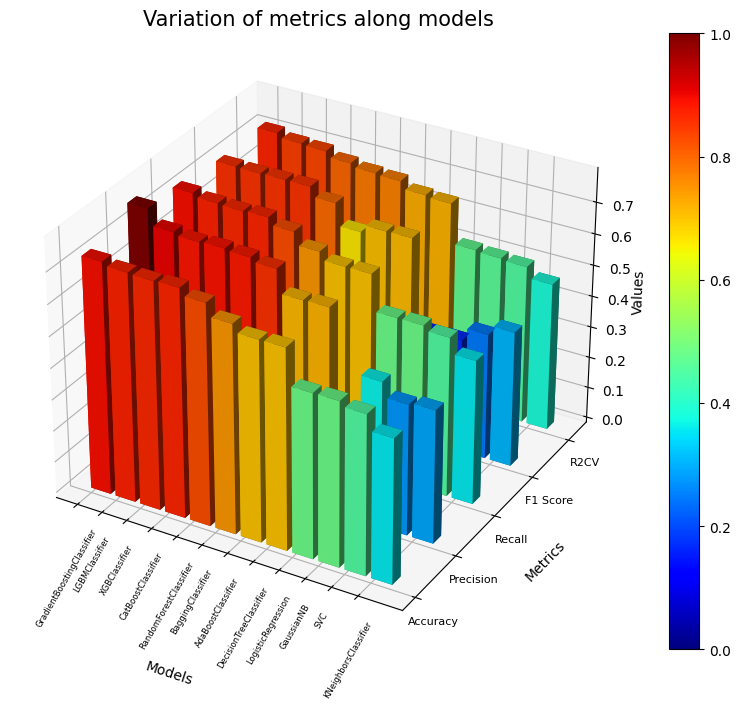

<Figure size 1500x600 with 0 Axes>

In [16]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet((z.flatten() - z.min()).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

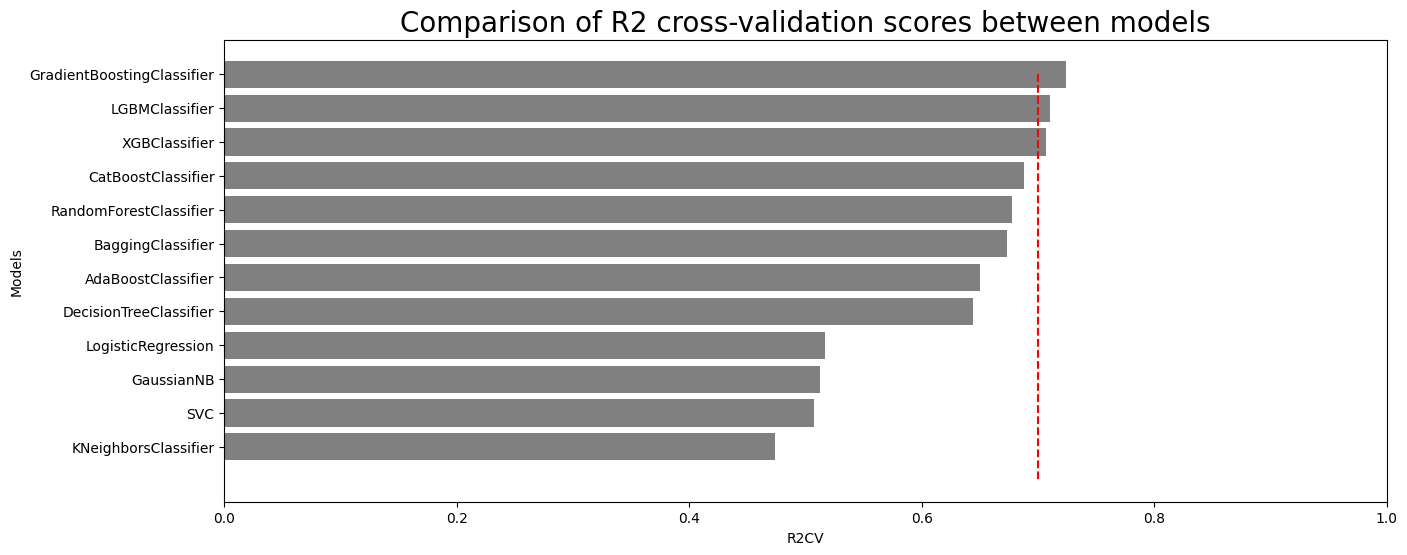

In [17]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 70%)

<b>Evaluation with Confusion matrix and ROC curves</b>

In [18]:
gb_pred = gb.predict(X_Gen_test)

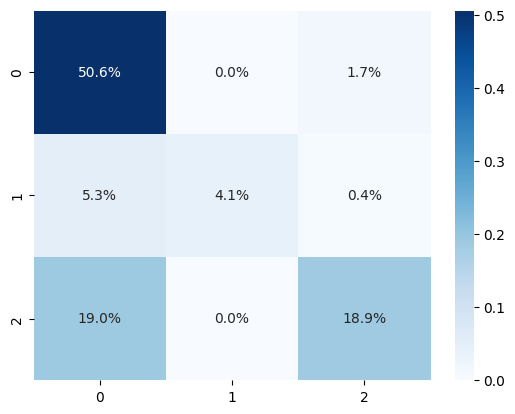

In [19]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Train and predict with Disorder_subclass dataframe

In [20]:
log.fit(X_Sub_train, y_Sub_train)
tree.fit(X_Sub_train, y_Sub_train)
knn.fit(X_Sub_train, y_Sub_train)
nb.fit(X_Sub_train, y_Sub_train)
svm.fit(X_Sub_train, y_Sub_train)
bag_clf.fit(X_Sub_train, y_Sub_train)
ada_clf.fit(X_Sub_train, y_Sub_train)
rf.fit(X_Sub_train, y_Sub_train)
gb.fit(X_Sub_train, y_Sub_train)
xgb.fit(X_Sub_train, y_Sub_train)
cat.fit(X_Sub_train, y_Sub_train)
lgb.fit(X_Sub_train, y_Sub_train)

Learning rate set to 0.090669
0:	learn: 2.0279793	total: 38.9ms	remaining: 38.9s
1:	learn: 1.9097681	total: 75.9ms	remaining: 37.9s
2:	learn: 1.8206238	total: 109ms	remaining: 36.1s
3:	learn: 1.7499601	total: 141ms	remaining: 35.1s
4:	learn: 1.6960918	total: 171ms	remaining: 34.1s
5:	learn: 1.6555490	total: 208ms	remaining: 34.4s
6:	learn: 1.6261492	total: 242ms	remaining: 34.3s
7:	learn: 1.6022444	total: 279ms	remaining: 34.6s
8:	learn: 1.5601190	total: 343ms	remaining: 37.8s
9:	learn: 1.5401594	total: 423ms	remaining: 41.9s
10:	learn: 1.5131514	total: 473ms	remaining: 42.5s
11:	learn: 1.4844903	total: 529ms	remaining: 43.5s
12:	learn: 1.4631240	total: 570ms	remaining: 43.3s
13:	learn: 1.4492458	total: 611ms	remaining: 43s
14:	learn: 1.4396231	total: 649ms	remaining: 42.6s
15:	learn: 1.4211038	total: 689ms	remaining: 42.4s
16:	learn: 1.4065043	total: 726ms	remaining: 42s
17:	learn: 1.3928205	total: 783ms	remaining: 42.7s
18:	learn: 1.3828230	total: 837ms	remaining: 43.2s
19:	learn: 1.

LGBMClassifier(random_state=42)

In [21]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")

--------------------
|LogisticRegression|
--------------------
Accuracy: 0.2662049861495845
Precision: 0.21263794031142175
Recall: 0.2662049861495845
F1 Score: 0.20390230742207985
R2 Cross Validation mean: 24.653739612188367
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.507202216066482
Precision: 0.5111974839570108
Recall: 0.507202216066482
F1 Score: 0.5087760329700699
R2 Cross Validation mean: 50.02770083102492
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.2041551246537396
Precision: 0.19658994290537748
Recall: 0.2041551246537396
F1 Score: 0.19532206694274432
R2 Cross Validation mean: 20.277008310249307
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.26011080332409975
Precision: 0.22

In [22]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="R2CV", inplace=True, ascending=False)
results_sub_df

,Models,Accuracy,Precision,Recall,F1 Score,R2CV
8,GradientBoostingClassifier,0.598615,0.661891,0.598615,0.599887,0.573961
9,XGBClassifier,0.591136,0.616567,0.591136,0.588398,0.567313
11,LGBMClassifier,0.589751,0.624964,0.589751,0.587444,0.567036
10,CatBoostClassifier,0.589474,0.613642,0.589474,0.585859,0.535457
7,RandomForestClassifier,0.537119,0.588363,0.537119,0.523834,0.506648
6,AdaBoostClassifier,0.510526,0.514076,0.510526,0.511966,0.501939
1,DecisionTreeClassifier,0.507202,0.511197,0.507202,0.508776,0.500277
5,BaggingClassifier,0.492521,0.613986,0.492521,0.462561,0.491967
0,LogisticRegression,0.266205,0.212638,0.266205,0.203902,0.246537
4,SVC,0.260111,0.197526,0.260111,0.201941,0.241828


The best model for this target seems to be still GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.59
- Precision: 0.66
- Recall: 0.60
- F1 Score: 0.60
- R2 Cross Validation mean: 0.57

These metrics are worse than those for the Genetic_disorder dataframe.

In [23]:
metrics_df = results_sub_df.set_index("Models").T
metrics_df

Models,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier,RandomForestClassifier,AdaBoostClassifier,DecisionTreeClassifier,BaggingClassifier,LogisticRegression,SVC,GaussianNB,KNeighborsClassifier
Accuracy,0.598615,0.591136,0.589751,0.589474,0.537119,0.510526,0.507202,0.492521,0.266205,0.260111,0.260111,0.204155
Precision,0.661891,0.616567,0.624964,0.613642,0.588363,0.514076,0.511197,0.613986,0.212638,0.197526,0.226658,0.19659
Recall,0.598615,0.591136,0.589751,0.589474,0.537119,0.510526,0.507202,0.492521,0.266205,0.260111,0.260111,0.204155
F1 Score,0.599887,0.588398,0.587444,0.585859,0.523834,0.511966,0.508776,0.462561,0.203902,0.201941,0.207418,0.195322
R2CV,0.573961,0.567313,0.567036,0.535457,0.506648,0.501939,0.500277,0.491967,0.246537,0.241828,0.216066,0.20277


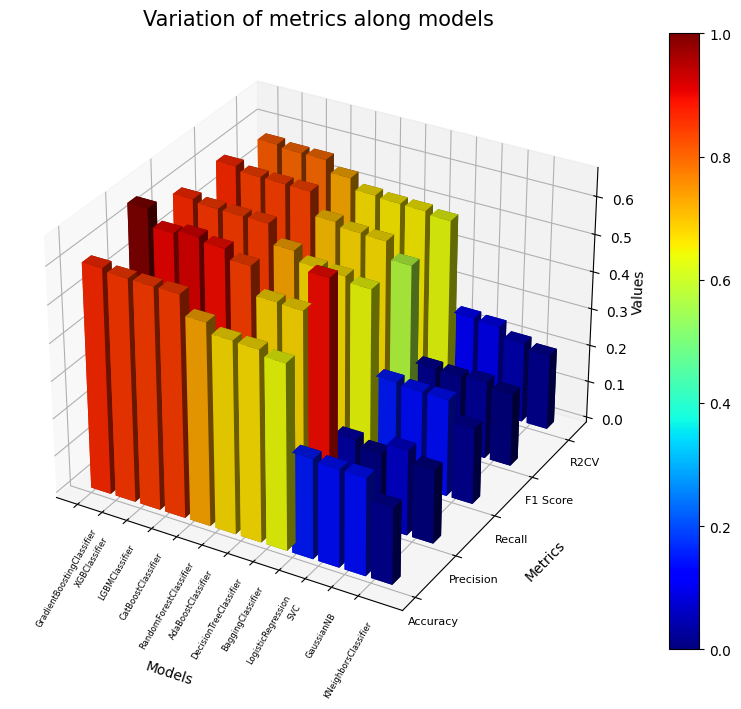

<Figure size 1500x600 with 0 Axes>

In [24]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet(((z.flatten() - z.min())).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

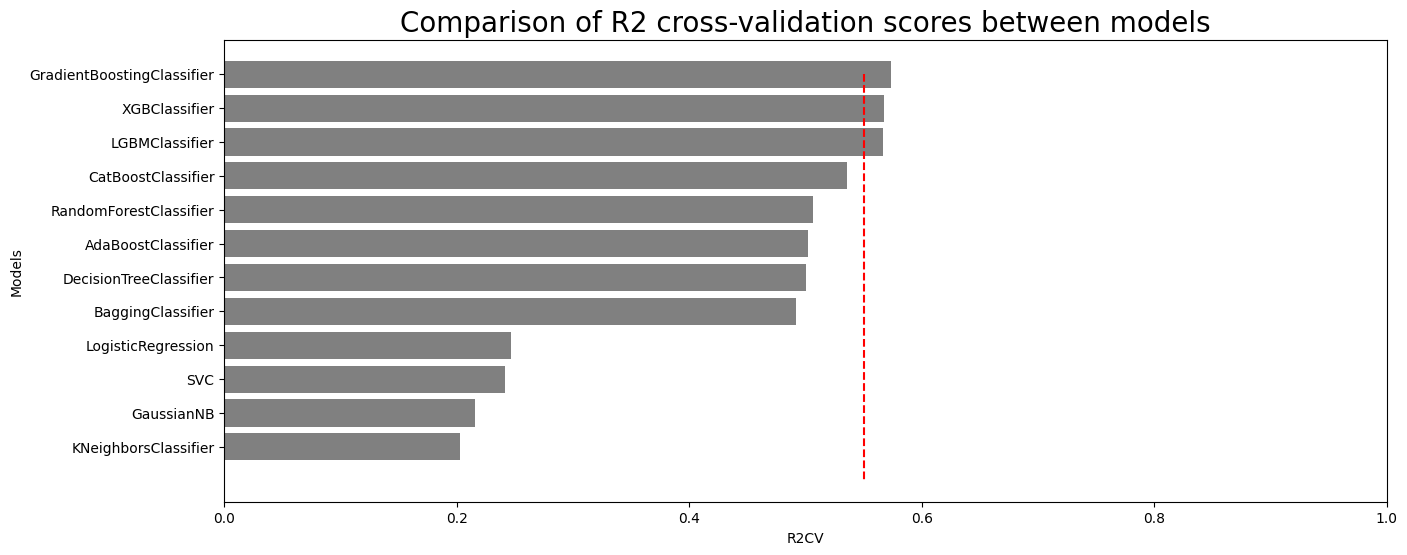

In [28]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_sub_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.55, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 55%), in this case all models have R2 lower than 70%

<b>Evaluation with Confusion matrix</b>

In [29]:
gb_pred = gb.predict(X_Sub_test)

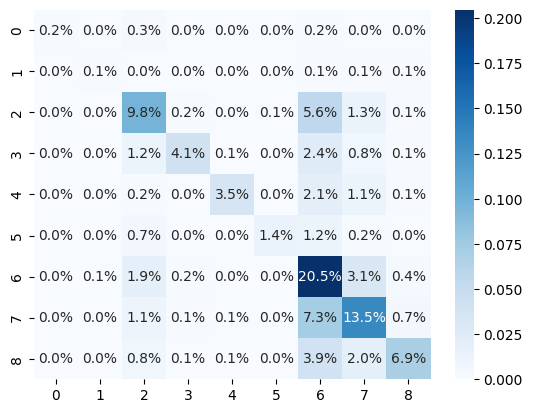

In [30]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## GridSearch

Tune the model in order to find the best hyperparameters


- Genetic disorder dataframe

In [34]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.3, 0.5, 0.7],
    'max_depth': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [615]:
grid_search = GridSearchCV(gb,
                           param_grid
                          )

grid_search.fit(X_Gen_train, y_Gen_train)

In [551]:
grid_search.best_params_

{'learning_rate': 0.7,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 30}

In [31]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.7371191135734072
Precision: 0.777493499938324
Recall: 0.7371191135734072
F1 Score: 0.7212820321015269
R2 Cross Validation mean: 71.66204986149584
--------------------------------------------------------------------------



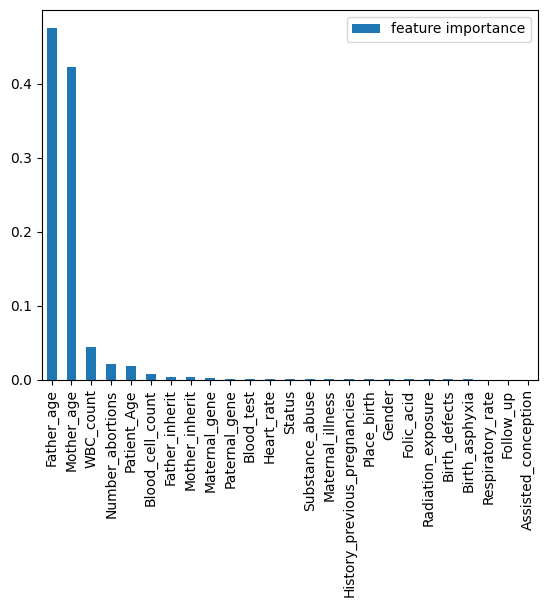

In [32]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, it may be because they have the highest values. However, we have done a StandardScaler on the whole dataframe.
# Maybe it should be effective to use the log transformation of those specific columns before using the StandardScaler.

- Subclass disorder dataframe

In [35]:
grid_search = GridSearchCV(gb,
                           param_grid
                          )

grid_search.fit(X_Sub_train, y_Sub_train)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.7,
                                                  max_depth=2,
                                                  max_features='auto',
                                                  n_estimators=30,
                                                  random_state=42),
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [36]:
grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 30}

In [38]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6024930747922438
Precision: 0.6685812180454076
Recall: 0.6024930747922438
F1 Score: 0.6035457924790354
R2 Cross Validation mean: 56.62049861495845
--------------------------------------------------------------------------



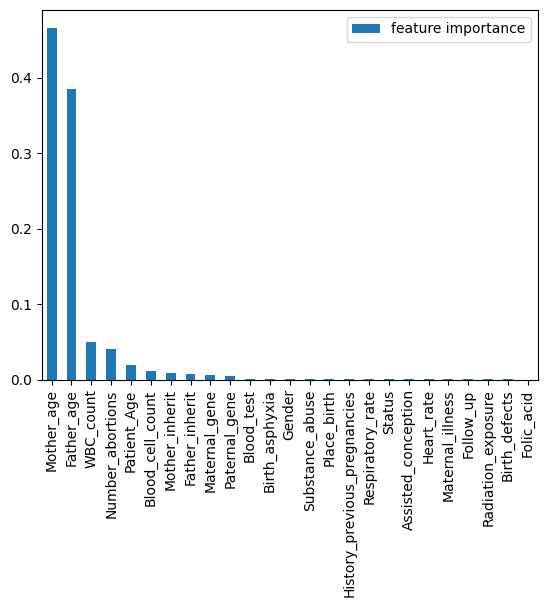

In [39]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, it may be because they have the highest values. However, we have done a StandardScaler on the whole dataframe.
# Maybe it should be effective to use the log transformation of those specific columns before using the StandardScaler.

## Clustering

In order to improve the model a first step of clustering is going to be made before the model training and fit.

- Genetic disorder dataframe

In [593]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Genetic_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

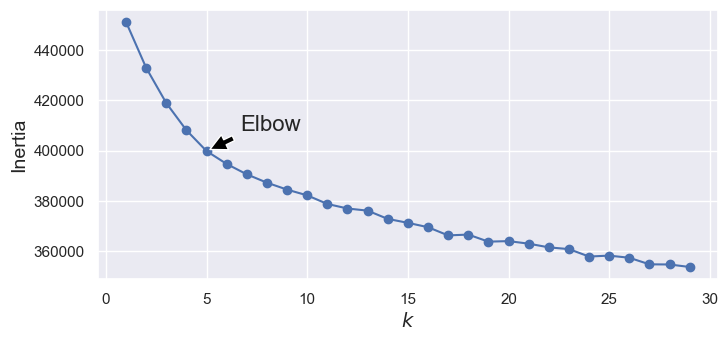

In [594]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [595]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(Genetic_X_scaled)

In [596]:
silhouette_score(Genetic_X_scaled, kmeans.labels_)

0.03372325438296902

In [559]:
silhouette_scores = [silhouette_score(Genetic_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

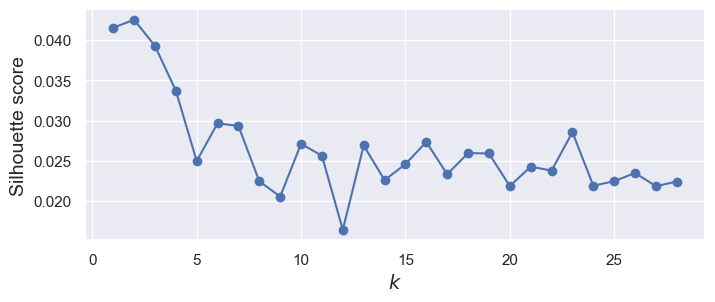

In [560]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

- Subclass dataframe

In [597]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Subclass_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

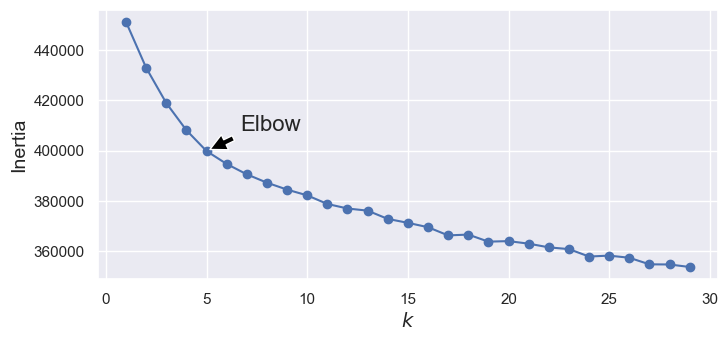

In [598]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [564]:
silhouette_score(Subclass_X_scaled, kmeans.labels_)

0.03372325438296902

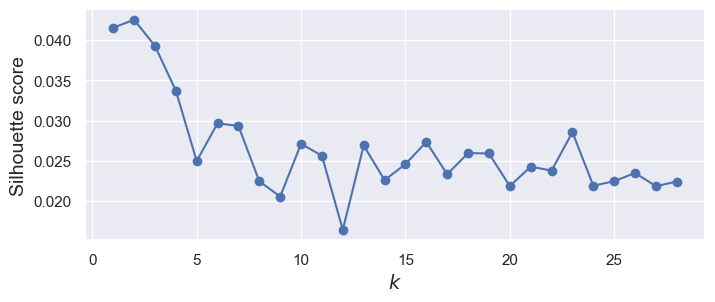

In [565]:
silhouette_scores = [silhouette_score(Subclass_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

## Logarithmic transformation of specific columns prior to training

In [40]:
# Original dataframe
df_eda
# Select columns to transform
COLS_TO_TRANSFORM = ['Father_age', 'Mother_age']

# Logaritmic transformation of specific columns
for c in [c for c in df_eda.columns if df_eda[c].name in COLS_TO_TRANSFORM]:
    df_eda[c] = np.log10(df_eda[c])

df_eda.head()

,Patient_Age,Mother_inherit,Father_inherit,Maternal_gene,Paternal_gene,Blood_cell_count,Mother_age,Father_age,Status,Respiratory_rate,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_previous_pregnancies,Number_abortions,Birth_defects,WBC_count,Blood_test,Genetic_disorder,Disorder_subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,1.542656,1.627144,0.0,0.0,...,0.0,0.0,0.0,1.0,1.97191,0.0,9.857562,3.0,0.0,5.0
1,6.0,1.0,0.0,0.0,0.0,4.893297,1.612784,1.342423,0.0,0.0,...,1.0,0.0,1.0,1.0,4.00000,1.0,7.474796,2.0,1.0,3.0
2,12.0,1.0,0.0,1.0,0.0,4.705280,1.322219,1.620203,1.0,1.0,...,0.0,0.0,1.0,1.0,1.00000,1.0,7.919321,1.0,0.0,6.0
3,11.0,1.0,0.0,1.0,1.0,4.720703,1.505150,1.610047,0.0,1.0,...,0.0,0.0,1.0,0.0,4.00000,0.0,4.098210,3.0,1.0,1.0
4,14.0,1.0,0.0,1.0,0.0,5.103188,1.539095,1.623410,1.0,0.0,...,0.0,0.0,1.0,0.0,0.00000,0.0,10.272230,2.0,2.0,2.0


In [44]:
# Create Genetic disorder dataframe
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)

# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

# Standardize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

In [45]:
# Create Disorder Subclass dataframe
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

# Standardize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

In [46]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Genetic Disorder after logarithmic transformation of specific columns are the same than without the transformation.

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.7371191135734072
Precision: 0.777493499938324
Recall: 0.7371191135734072
F1 Score: 0.7212820321015269
R2 Cross Validation mean: 71.63434903047093
--------------------------------------------------------------------------



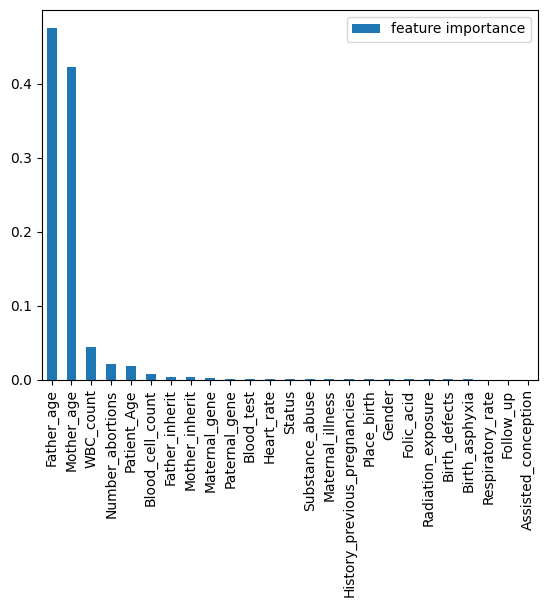

In [49]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

In [53]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Disorder Subclass after logarithmic transformation of specific columns are the same than without the transformation.

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6024930747922438
Precision: 0.6685812180454076
Recall: 0.6024930747922438
F1 Score: 0.6035457924790354
R2 Cross Validation mean: 56.62049861495845
--------------------------------------------------------------------------



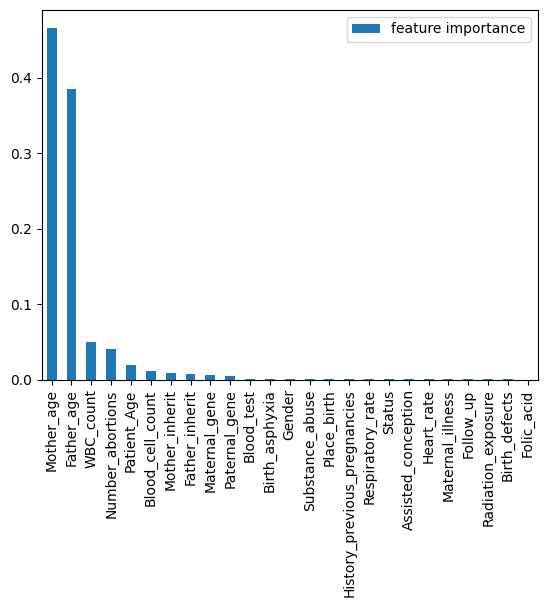

In [52]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

# Pipeline and definitive model

## Pipeline
- Genetic Disorder

In [54]:
# Create the pipeline
pipeline_Gen = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [56]:
# Train the Genetic Disorder data with the pipeline
Gen_model = pipeline_Gen.fit(X_Gen_train, y_Gen_train)
pipeline_Gen.score(X_Gen_test, y_Gen_test)

0.5121883656509695

In [58]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics dropped and are worse than doing the Gradient Boosting alone

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.5121883656509695
Precision: 0.41372660663380273
Recall: 0.5121883656509695
F1 Score: 0.3890750694868992
R2 Cross Validation mean: 48.642659279778385
--------------------------------------------------------------------------



- Subclass disorder

In [59]:
# Create the pipeline
pipeline_Sub = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [61]:
# Train the Disorder Subclass data with the pipeline
Sub_model = pipeline_Sub.fit(X_Sub_train, y_Sub_train)
pipeline_Sub.score(X_Sub_test, y_Sub_test)

# Pipeline score is really low so we can assume this model is not better

0.2518005540166205

In [62]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")
# Metrics dropped and are worse than doing the Gradient Boosting alone

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.2518005540166205
Precision: 0.1833266109474598
Recall: 0.2518005540166205
F1 Score: 0.16337144221737374
R2 Cross Validation mean: 22.57617728531856
--------------------------------------------------------------------------



Metrics have been deeply affected by clustering, so it won't be used for the final modeling

## Definitive model

In [63]:
# Since none of the latter models were performing better than the Gradient Boosting model, those are going to be save
Gen_model_def = gb_Gen_model

In [64]:
Sub_model_def = gb_Sub_model

- Save the model

In [65]:
genetic_model_def = "Gen_model_def.pkl"
subclass_model_def = "Sub_model_def.pkl"

pickle.dump(genetic_model_def, open('../model/genetic_model_def', 'wb'))
pickle.dump(subclass_model_def, open('../model/subclass_model_def', 'wb'))